# Ch 5 - Support Vector Machines

This JN contains the code associated with Chapter 5 of the book. Please see the corresponding notes for more details.

## Linear SVM Classification

**Soft Margin Classification**

To implement an SVM model, we will use the Iris data set, do feature scaling(!), and create a pipeline to train the model.

All of this should be pretty fast for us, now that we have a lot of experience with creating ML models!!

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
iris = datasets.load_iris()

X = iris["data"][:, (2,3)] # Petal length and width, respectively
y = (iris["target"] == 2).astype(np.float64) # Only class w.r.t 'virginica'

In [9]:
scaler = StandardScaler()

svm_classifier = Pipeline([
    ("scaler", scaler),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [10]:
svm_classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

We can visualize the decision boundary created by our SVM model:

In [19]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [67]:
C_hyperparameter=1

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=C_hyperparameter, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf1.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [68]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

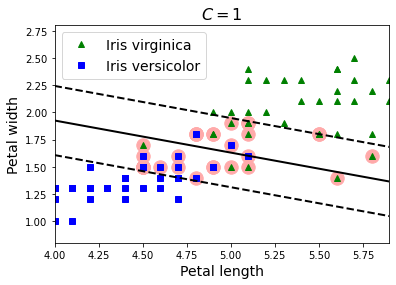

In [69]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

**Remarks**

(1) Another way to create an SVM model is to use SKL's 'SVC' class instead, and specify the 'kernal' hyperparameter to be "linear".

(2) You can also implement stochastic gradient descent when training and SVM model. You would simply instantiate an SGDClassifier class and specify the hyperparameter 'loss' to be "hinge", and 'alpha' to be "1/(m\*C))". It won't converge as fast as using 'LinearSVC' but it can be **useful when handling online classification tasks AND/OR when working with very large data sets (i.e. out-of-core training)**.

(3) Be sure to set the 'loss' hyperparameter to "hinge", as this is NOT the default!

(4) For better performance, you should set the 'dual' hyperparameter to "False" (unless there are more features than training instances; see later...)